In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
filename = "/home/parth/Machine Learning/Datasets/North Corp/rawfeed_april_0_CAN.csv"
data = pd.read_csv(filename)

In [3]:
deviceData = []
ids = data["deviceID"].unique()
for device in ids:
    temp = data[data.deviceID == device].copy()
    temp = temp.sort_values("utc" , ascending=True)
    deviceData.append(temp)

In [4]:
for i in range(len(deviceData)):
    deviceData[i]["Acceleration"] = deviceData[i].vehicleSpeed.diff() * (5.0/18.0) / deviceData[i].utc.diff()

In [6]:
deviceData[0].head(10)

,Unnamed: 0,id,date,type,deviceID,sequenceNo,latitude,longitude,utc,hrlfc,...,powerKeyPos,accPedalIdelSwitch,vehicleSpeed,controlerTrimMode,engineOilPressure,engineCoolantTemp,accPedalPosition,tripFuel,live,Acceleration
0,1,8,2019-04-01 00:00:02.0,CAN,359218062578930,4107,21.94126,75.13216,607392002,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,NaN
4,10,71,2019-04-01 00:01:02.0,CAN,359218062578930,4109,21.94126,75.13216,607392062,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0
8,19,136,2019-04-01 00:02:02.0,CAN,359218062578930,4111,21.94126,75.13216,607392122,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0
12,28,203,2019-04-01 00:03:02.0,CAN,359218062578930,4113,21.94126,75.13216,607392182,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0
15,34,255,2019-04-01 00:04:02.0,CAN,359218062578930,4115,21.94126,75.13217,607392242,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0
20,44,332,2019-04-01 00:05:02.0,CAN,359218062578930,4117,21.94126,75.13217,607392302,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0
24,53,397,2019-04-01 00:06:02.0,CAN,359218062578930,4119,21.94126,75.13217,607392362,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0
28,62,461,2019-04-01 00:07:02.0,CAN,359218062578930,4121,21.94125,75.13217,607392422,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0
32,71,517,2019-04-01 00:08:02.0,CAN,359218062578930,4123,21.94125,75.13217,607392482,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0
36,80,559,2019-04-01 00:09:02.0,CAN,359218062578930,4125,21.94125,75.13217,607392542,5708.15,...,0,0,0.0,0,0,80,0.0,5708.15,1,0.0


In [7]:
max_acc = 0.01
for i in range(len(deviceData)):
    print(" {:.2f}% of Cases have hard Acceleration Device ID : {}".format(
        100 *np.mean(np.array(deviceData[i].Acceleration > max_acc).astype(np.float32)) , ids[i]))

 11.38% of Cases have hard Acceleration Device ID : 359218062578930
 8.95% of Cases have hard Acceleration Device ID : 359218062578880
 7.36% of Cases have hard Acceleration Device ID : 359218062576470
 18.99% of Cases have hard Acceleration Device ID : 359218062581850
 19.24% of Cases have hard Acceleration Device ID : 355842076730650
 7.94% of Cases have hard Acceleration Device ID : 355842076726070
 31.90% of Cases have hard Acceleration Device ID : 359218063507540
 31.11% of Cases have hard Acceleration Device ID : 359218063496330
 7.73% of Cases have hard Acceleration Device ID : 359218062174680
 26.18% of Cases have hard Acceleration Device ID : 359218062586180
 3.22% of Cases have hard Acceleration Device ID : 355842076726450
 33.64% of Cases have hard Acceleration Device ID : 359218063670330
 15.84% of Cases have hard Acceleration Device ID : 359218063676170


In [6]:
data_weeks = data.utc//(60 * 60 * 24 * 7) - 1003

In [7]:
data_weeks.value_counts(0)

4    64796
3    50624
2    43552
5    39702
1    34893
0      448
Name: utc, dtype: int64

In [8]:
for i in range(len(deviceData)):
    deviceData[i]["Mileage"] = deviceData[i]["totalDistance"].diff() / (deviceData[i]['tripFuel'].diff() * 3.8 )

In [9]:
corr_matrix = deviceData[0].corr()

corr_matrix_list = []
for i in range(len(deviceData)):
    corr_matrix_list.append(deviceData[i].corr())

print("Important Features with Linear Relationships (With Mileage): ")
print(corr_matrix["Mileage"][abs(corr_matrix["Mileage"]) > 0.1])

Important Features with Linear Relationships (With Mileage): 
vehicleSpeed         0.254134
engineCoolantTemp    0.109830
Acceleration        -0.200269
Mileage              1.000000
Name: Mileage, dtype: float64


In [10]:
valid_cols = []
for col  in corr_matrix.columns:
    if not corr_matrix.Mileage.isna()[col] :
        valid_cols.append(col)

In [11]:
for i , id_ in zip(range(len(deviceData)) , ids):
    deviceData_Mileage = corr_matrix_list[i][valid_cols]
    deviceData_Mileage.to_csv("Mileage Correlations - {}.csv".format(id_))

In [12]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=100 , bootstrap=True , n_jobs=-1 , oob_score = True)

In [13]:
useless = [ "Mileage", "Unnamed: 0", "id" , "deviceID" , "sequenceNo" ,"latitude", "longitude", "utc"  , "hrlfc"
                  , "sweetSpot" , "seconds"  , "minute" , "hour" , "month" , "day" ]
for col in useless :
    try :
        valid_cols.remove(col)
    except : pass

In [14]:
X = deviceData[0][valid_cols].copy().values
X[np.isnan(X)] = 0
y = deviceData[0]["Mileage"].copy().values
y[np.isnan(y)] = 0
y[np.isinf(y)] = 0

zero_mileage_indicies = y != 0



X = X[zero_mileage_indicies]
ind2 = X[: , -1] != 0
X = X[ind2]
y = y[zero_mileage_indicies]
y = y[ind2]

In [15]:
rnd_clf.fit(X , y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [16]:
print("Most Important Features for consideration of Mileage (Ranked) \n")

importances = rnd_clf.feature_importances_
indx = importances.argsort()

valid_cols = np.array(valid_cols)
valid_cols_sorted = valid_cols[indx]
importances = importances[indx]

for i in reversed(range(len(valid_cols))):
    print( valid_cols_sorted[i] , importances[i])
    
print("Regressor R squared : {}".format(100 * rnd_clf.oob_score_))
#print("Hence Feature Importance are reliable")

Most Important Features for consideration of Mileage (Ranked) 

vehicleSpeed 0.2636469257240353
Acceleration 0.19858858465005386
engineCoolantTemp 0.16898854710613012
engineOilPressure 0.11372590523495364
engineSpeed 0.06463374592664341
fuelLevel 0.04671798754177323
tripFuel 0.03877117439901285
totalDistance 0.038046001790464606
engineOperatingHours 0.03672269199742986
redStopLamp 0.00812996650537713
occurenceCount 0.0053012403563737305
failurMode 0.004716641708482247
sPNLSB 0.004420931777326065
live 0.004284221120280482
sPN8_2ndByte 0.003305434161663481
Regressor R squared : 40.84658003432096


Size of Dots : Engine Oil Pressure 
Color of Dots : Vehicle Speed


<IPython.core.display.Javascript object>


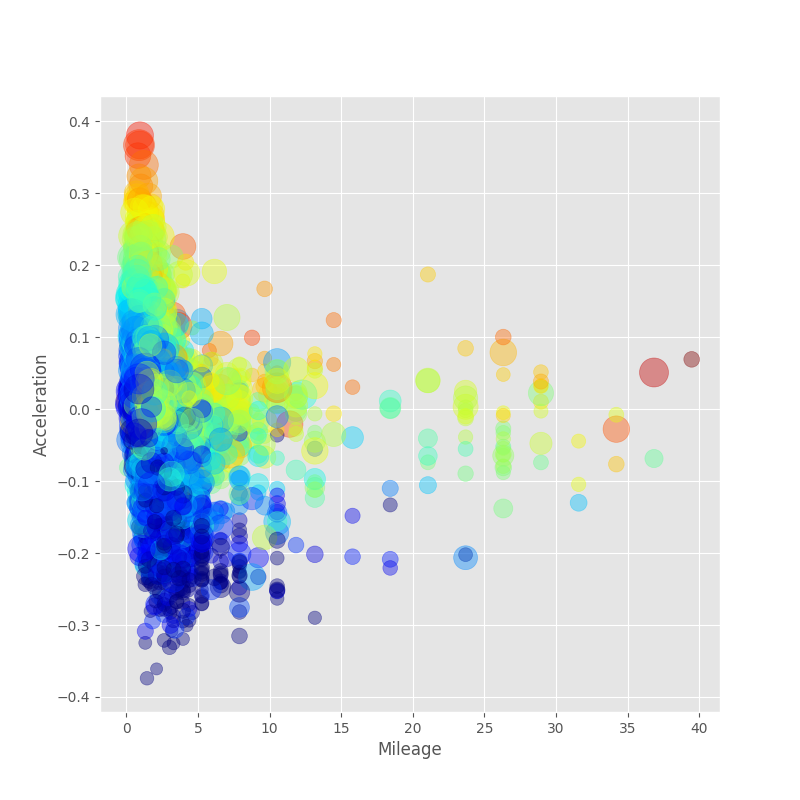

Text(0, 0.5, 'Acceleration')

In [17]:
temp = deviceData[0][zero_mileage_indicies][ind2]
%matplotlib notebook
print("Size of Dots : Engine Oil Pressure \nColor of Dots : Vehicle Speed")
plt.style.use('ggplot')
plt.figure(figsize=(8 , 8))
plt.scatter(x=temp.Mileage , y=temp.Acceleration , alpha=0.4 , c=temp.vehicleSpeed , cmap=plt.get_cmap('jet'),
            s=temp.engineOilPressure )
plt.xlabel('Mileage')
plt.ylabel('Acceleration')


In [71]:
y.mean()

2.4443745793918152

In [76]:

x = list(y == y.min() ) + [False] * (38673 - 10979)
x = np.array(x)
deviceData[0][valid_cols][zero_mileage_indicies][ind2][y == y.min()]

,totalDistance,fuelLevel,redStopLamp,sPNLSB,sPN8_2ndByte,failurMode,occurenceCount,engineSpeed,engineOperatingHours,vehicleSpeed,engineOilPressure,engineCoolantTemp,tripFuel,live,Acceleration
68157,42943.6,100.0,0,86,2,2,1,1220.5,1137.45,41.52,164,93,6257.06,1,0.087639


In [78]:
data.columns

Index(['Unnamed: 0', 'id', 'date', 'type', 'deviceID', 'sequenceNo',
       'latitude', 'longitude', 'utc', 'hrlfc', 'sweetSpot', 'topGear',
       'sweetSpotPercent', 'seconds', 'minute', 'hour', 'month', 'day', 'year',
       'minuteOffset', 'hourOffset', 'totalDistance', 'fuelLevel',
       'amberWarningLamp', 'redStopLamp', 'malfunctionLamp',
       'flashMalFunctionLamp', 'sPNLSB', 'sPN8_2ndByte', 'failurMode',
       'sPN3_MSB', 'occurenceCount', 'cCA', 'cCES', 'cCSS', 'engineSpeed',
       'engineStartMode', 'engineOperatingHours', 'powerKeyPos',
       'accPedalIdelSwitch', 'vehicleSpeed', 'controlerTrimMode',
       'engineOilPressure', 'engineCoolantTemp', 'accPedalPosition',
       'tripFuel', 'live'],
      dtype='object')